In [28]:
# import required libraries
import pandas as pd
import os
from matplotlib import pyplot as plt, style
import seaborn as sns
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
style.use('fivethirtyeight')

In [29]:
# path of the folder where csv files are located
folder_path = "../datasets/"

In [30]:
file_list = os.listdir(folder_path)
file_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [31]:
#concat all files together
df = pd.concat([pd.read_csv(folder_path+file) for file in file_list])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [33]:
# output the combined data as csv
df.to_csv("sales_combined_data.csv", index=False)

In [34]:
# read the sales data
sales_df = pd.read_csv('sales_combined_data.csv')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [35]:
sales_df.shape

(186850, 6)

In [36]:
sales_df.index

RangeIndex(start=0, stop=186850, step=1)

In [37]:
sales_df.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [38]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [39]:
sales_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [40]:
sales_df.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186843,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [42]:
sales_df['Order ID'].nunique()

178438

In [43]:
sales_df['Product'].unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [44]:
# null values count
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [45]:
# drop na values from columns
sales_df.dropna(axis=0, inplace=True)

In [46]:
# duplicate header rows in data
duplicate_rows = sales_df.loc[sales_df['Order ID'] == 'Order ID']
duplicate_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [47]:
# dropping those duplicates header rows
sales_df.drop(duplicate_rows.index, axis=0, inplace=True)

In [48]:
# we have duplicates entries more than ones So keep last entry and drop other entries
sales_df.loc[sales_df['Order ID'] == '176585']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"


In [49]:
sales_df.drop_duplicates(subset=sales_df.columns, keep='last', inplace=True)

In [50]:
# Rename columns for data consistency
sales_df.rename(columns={
    'Order ID': 'Order_ID', 
    'Quantity Ordered': 'Quantity', 
    'Price Each': 'Price', 
    'Purchase Address': 'Address',
}, inplace=True)

In [51]:
sales_df = sales_df.assign(
    Order_Date = pd.to_datetime(sales_df['Order Date']).dt.strftime("%Y-%m-%d"),
    Month = pd.to_datetime(sales_df['Order Date']).dt.month,
    Hour = pd.to_datetime(sales_df['Order Date']).dt.hour,
    Minute = pd.to_datetime(sales_df['Order Date']).dt.minute,
    City = sales_df['Address'].apply(lambda x: x.split(',')[1].strip()),
    State = sales_df['Address'].apply(lambda x: x.split(',')[2].strip().split(' ')[0]),
    Sales = sales_df['Quantity'].astype("int").mul(sales_df['Price'].astype("float"))
)

In [52]:
# now drop existing Order Date column
sales_df.drop('Order Date', axis=1, inplace=True)

In [53]:
# convert data types for columns
sales_df = sales_df.astype({
    "Order_ID": "int",
    "Quantity": "int",
    "Price": "float",
    "Order_Date": "datetime64[ns]"
})

In [54]:
sales_df = sales_df.reindex(
    labels=['Order_ID', 'Order_Date', 'Product', 'Address', 'City', 'State', 
            'Month', 'Hour', 'Minute', 'Quantity', 'Price','Sales'
            ], axis=1)

In [60]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Order_ID    185686 non-null  int64         
 1   Order_Date  185686 non-null  datetime64[ns]
 2   Product     185686 non-null  object        
 3   Address     185686 non-null  object        
 4   City        185686 non-null  object        
 5   State       185686 non-null  object        
 6   Month       185686 non-null  int32         
 7   Hour        185686 non-null  int32         
 8   Minute      185686 non-null  int32         
 9   Quantity    185686 non-null  int64         
 10  Price       185686 non-null  float64       
 11  Sales       185686 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 16.3+ MB


In [61]:
sales_df.isna().sum()

Order_ID      0
Order_Date    0
Product       0
Address       0
City          0
State         0
Month         0
Hour          0
Minute        0
Quantity      0
Price         0
Sales         0
dtype: int64

In [62]:
sales_df.to_csv("sales_cleaned_data.csv", index=False)

### SALES ANALYSIS AND VISUALIZATION

In [64]:
# read sales cleaned data
sales = pd.read_csv('sales_cleaned_data.csv')

In [65]:
sales.shape

(185686, 12)

In [66]:
sales.head(10)

,Order_ID,Order_Date,Product,Address,City,State,Month,Hour,Minute,Quantity,Price,Sales
0,176558,2019-04-19,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",Dallas,TX,4,8,46,2,11.95,23.90
1,176559,2019-04-07,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",Boston,MA,4,22,30,1,99.99,99.99
2,176560,2019-04-12,Google Phone,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,4,14,38,1,600.00,600.00
3,176560,2019-04-12,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,4,14,38,1,11.99,11.99
4,176561,2019-04-30,Wired Headphones,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,4,9,27,1,11.99,11.99
5,176562,2019-04-29,USB-C Charging Cable,"381 Wilson St, San Francisco, CA 94016",San Francisco,CA,4,13,3,1,11.95,11.95
6,176563,2019-04-02,Bose SoundSport Headphones,"668 Center St, Seattle, WA 98101",Seattle,WA,4,7,46,1,99.99,99.99
7,176564,2019-04-12,USB-C Charging Cable,"790 Ridge St, Atlanta, GA 30301",Atlanta,GA,4,10,58,1,11.95,11.95
8,176565,2019-04-24,Macbook Pro Laptop,"915 Willow St, San Francisco, CA 94016",San Francisco,CA,4,10,38,1,1700.00,1700.00
9,176566,2019-04-08,Wired Headphones,"83 7th St, Boston, MA 02215",Boston,MA,4,14,5,1,11.99,11.99


#### Question 1: What was the best month for sales? How much was earned that month?

In [76]:
sales_by_month = sales.groupby('Month')[['Sales']].sum().sort_values('Sales', ascending=False)
sales_by_month

,Sales
Month,
12,4608295.70
10,3734777.86
4,3389217.98
11,3197875.05
5,3150616.23
3,2804973.35
7,2646461.32
6,2576280.15
8,2241083.37


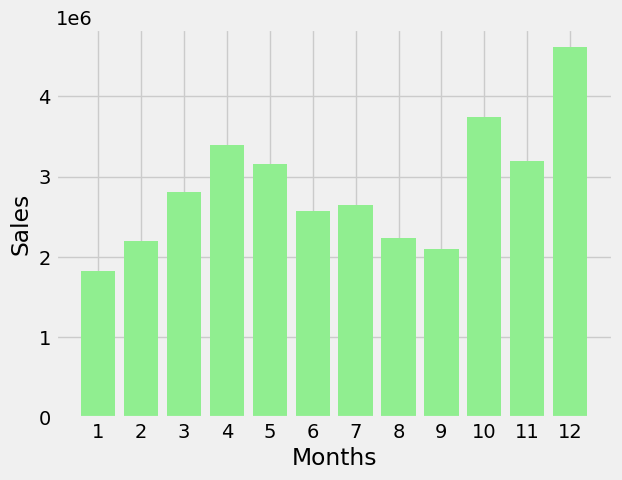

In [77]:
## SALES plot data
Months = sales_by_month.index.to_list()
plt.bar(Months, sales_by_month.Sales, color='lightgreen')
plt.xticks(Months)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.show()

#### Question 2: What city has the highest sales?

In [ ]:

sales_by_cities = sales.groupby('City')[['Sales']].sum().sort_values('Sales', ascending=False)
sales_by_cities

,Sales
City,
San Francisco,8254743.55
Los Angeles,5448304.28
New York City,4661867.14
Boston,3658627.65
Atlanta,2794199.07
Dallas,2765373.96
Seattle,2745046.02
Portland,2319331.94
Austin,1818044.33


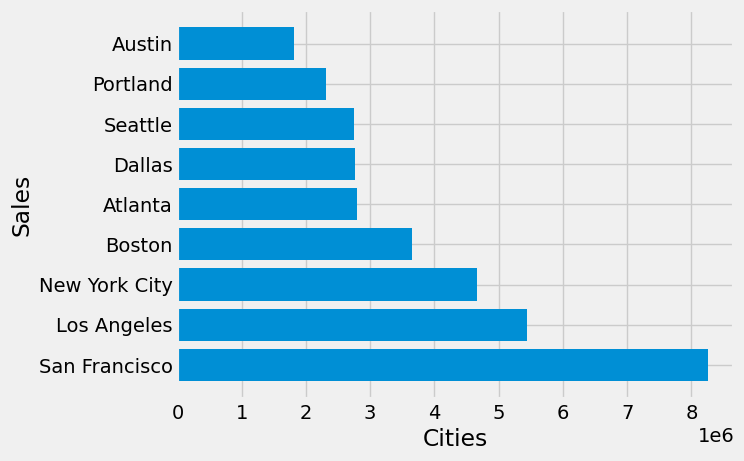

In [70]:
# plot data here
cities = sales_by_cities.index.to_list()
plt.barh(cities, sales_by_cities.Sales)
plt.ylabel('Sales')
plt.xlabel('Cities')
plt.show()

#### 3. What time should we display advertisements to maximize likelihood of customer's buying product?

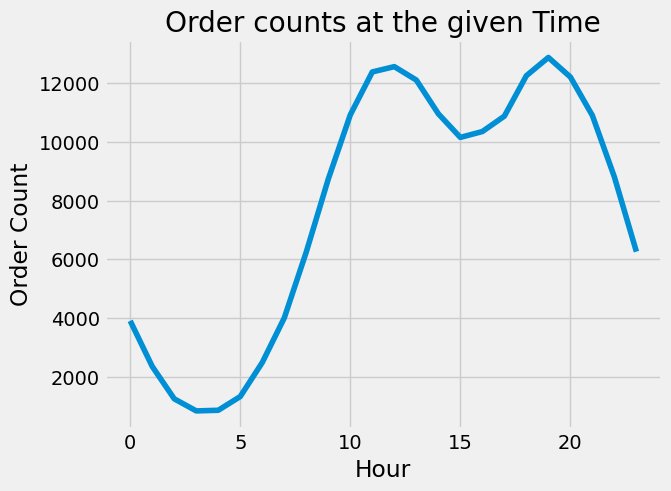

In [ ]:
grouped_time = sales.groupby('Hour').size()
grouped_time.plot(
    title="Order counts at the given Time", 
    kind='line',
    xlabel='Hour',
    ylabel='Order Count')
plt.show()

#### Question 4: What products are most often sold together?


In [ ]:
duplicate_order_ids = sales[sales['Order_ID'].duplicated(keep=False)]
duplicate_order_ids['Products_Grouped'] = duplicate_order_ids.groupby('Order_ID')['Product'].transform(lambda x : ','.join(x))

products_combined = duplicate_order_ids[['Order_ID', 'Products_Grouped']].drop_duplicates()
item_counts = Counter()

for row in products_combined['Products_Grouped']:
    split_ = row.split(',')
    item_counts.update(Counter(combinations(split_, 2)))

for products, count in item_counts.most_common(10):
    print(f"{', '.join(products)}: {count}")

iPhone, Lightning Charging Cable: 1001
Google Phone, USB-C Charging Cable: 985
iPhone, Wired Headphones: 447
Google Phone, Wired Headphones: 413
Vareebadd Phone, USB-C Charging Cable: 361
iPhone, Apple Airpods Headphones: 360
Google Phone, Bose SoundSport Headphones: 220
USB-C Charging Cable, Wired Headphones: 158
Vareebadd Phone, Wired Headphones: 143
Lightning Charging Cable, Wired Headphones: 92


#### Question 5: What product sold the most? Why do you think it sold the most?


In [ ]:
most_product_sold = sales.groupby('Product')[['Quantity']].sum().sort_values('Quantity', ascending=False)
most_product_sold

,Quantity
Product,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
27in FHD Monitor,7541
iPhone,6847


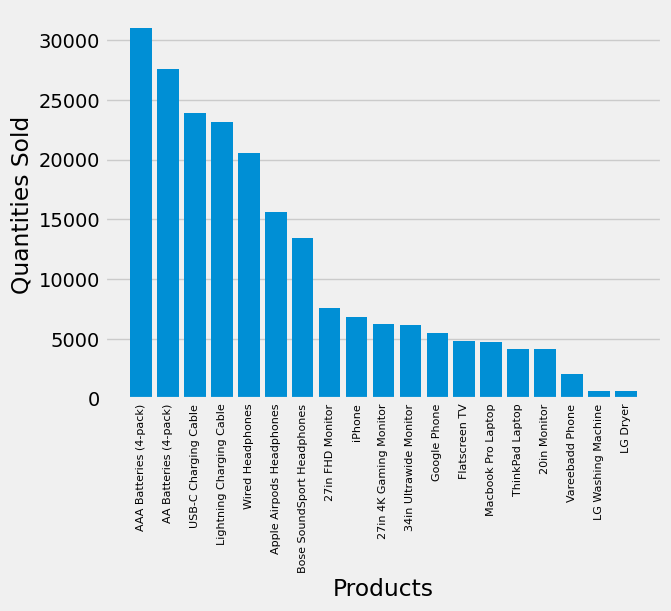

In [74]:
products = most_product_sold.index.to_list()
plt.bar(products, most_product_sold.Quantity)
plt.ylabel('Quantities Sold')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.grid(axis='x')
plt.show()